In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Problem Statement
So what determines the property prices in Namma Bengaluru? Data : The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name. Features Area_type - describes the area Availability - when it can be possessed or when it is ready(categorical and time-series) Location - where it is located in Bengaluru Price - Value of the property in lakhs(INR) Size - in BHK or Bedroom (1-10 or more) Society - to which society it belongs Total_sqft - size of the property in sq.ft Bath - No. of bathrooms Balcony - No. of the balcony Problem Statement With the given 9 features
    (categorical and continuous) build a model to predict the price of houses in Bengaluru.

evaluation matrix= 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())


In [2]:
train=pd.read_csv("C:/Users/NANDINI MK/Downloads/Data/Data/Train.csv")
test=pd.read_csv("C:/Users/NANDINI MK/Downloads/Data/Data/Test.csv")

In [3]:
train.head()
train.shape

(13320, 9)

In [4]:
test.shape

(1480, 9)

In [5]:
train.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
test.shape

(1480, 9)

In [7]:
combined_df=pd.concat([train,test],ignore_index=True)
combined_df.shape

(14800, 9)

In [8]:
combined_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14800 non-null  object 
 1   availability  14800 non-null  object 
 2   location      14799 non-null  object 
 3   size          14782 non-null  object 
 4   society       8672 non-null   object 
 5   total_sqft    14800 non-null  object 
 6   bath          14720 non-null  float64
 7   balcony       14122 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [10]:
combined_df.isnull().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath              80
balcony          678
price           1480
dtype: int64

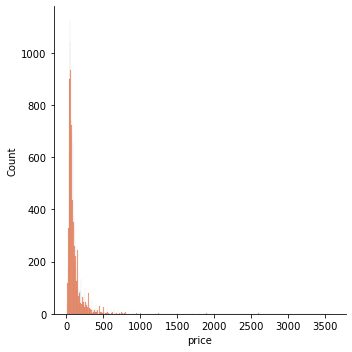

In [11]:
sns.displot(combined_df['price'],color='coral')

In [12]:
#Plot Area,Super Built-up Area,Built-up Area,Carpet Area--- priority of plot

In [13]:
import re

In [14]:
combined_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
def number(x):
    if isinstance(x, str):  # Check if x is a string
        for i in x:
            if i.isdigit():
                return i
    elif isinstance(x, float):  # Check if x is a float
        return None  # Or any other default value you prefer
    return None  # In case x is neither a string nor a float
combined_df['size']=combined_df['size'].apply(number)

In [16]:
combined_df['size']=combined_df['size'].fillna(round(combined_df.groupby(['size'])['bath'].transform('mean')))

In [17]:
combined_df['size']=combined_df['size'].replace(np.nan,combined_df['size'].mode()[0])

In [18]:
combined_df['bath']=combined_df['bath'].fillna(round(combined_df.groupby(['bath'])['size'].transform('mean')))

In [19]:
combined_df['balcony']=combined_df['balcony'].fillna(0)

In [20]:
import re

def process_data(value):
    if not value or value.strip() == '':
        return None 

    value = value.strip()
    
    try:
        if '-' in value:  
            start, end = map(float, value.split(' - '))
            mean = (start + end) / 2
            return mean
        elif 'Sq. Meter' in value:  
            num = float(re.search(r"[\d.]+", value).group())
            sq_feet = num * 10.764
            return sq_feet
        elif 'Sq. Yards' in value:  
            num = float(re.search(r"[\d.]+", value).group())
            sq_feet = num * 9
            return sq_feet
        else:  
            return float(value)
    except ValueError:
        return None 

combined_df['total_sqft']=combined_df['total_sqft'].apply(process_data)

# Missing value Treatment 

In [21]:
combined_df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         6128
total_sqft        15
bath              80
balcony            0
price           1480
dtype: int64

In [22]:
combined_df['total_sqft']=combined_df['total_sqft'].fillna(combined_df.groupby('size')['total_sqft'].transform('mean'))


In [23]:
combined_df['bath']=combined_df['bath'].fillna(combined_df.groupby('bath')['size'].transform('mean'))
combined_df['bath'] = np.where(combined_df['bath'].isna(), combined_df['size'], combined_df['bath'])
# np.where replaces null values based on boolean 
# initially replace null with transform mean, then replaced the leftovers with where condition 

In [24]:
combined_df=combined_df.drop('availability',axis=1)

In [25]:
combined_df['balcony']=combined_df['balcony'].fillna(0)

In [26]:
combined_df[['bath','balcony','size']]=combined_df[['bath','balcony','size']].astype('int')

In [27]:
combined_df.isnull().sum()

area_type        0
location         1
size             0
society       6128
total_sqft       0
bath             0
balcony          0
price         1480
dtype: int64

# Feature Engineering

In [28]:
combined_df['location'].value_counts()

Whitefield                         591
Sarjapur  Road                     437
Electronic City                    337
Kanakpura Road                     298
Thanisandra                        277
                                  ... 
K R C kothanur                       1
1Channasandra                        1
Vijayabank bank layout               1
Saptagiri Layout                     1
Vishweswaraiah Layout 4th Block      1
Name: location, Length: 1358, dtype: int64

In [29]:
average_price_per_location = combined_df.groupby('location')['price'].mean().reset_index()
average_price_per_location.columns = ['location', 'avg_price']
# calculating areawise average and combine it with original data
combined_df = combined_df.merge(average_price_per_location, on='location', how='left')

#calculate mean and standard deviation of the average prices
mean_price = average_price_per_location['avg_price'].mean()
std_dev_price = average_price_per_location['avg_price'].std()

# Define a function to classify areas based on price
def classify_area(price):
    if price < mean_price - std_dev_price:
        return 'cheap_area'
    elif price > mean_price + std_dev_price:
        return 'costly_area'
    else:
        return 'normal_area'

# Apply classification
combined_df['area_category'] = combined_df['avg_price'].apply(classify_area)

In [30]:
combined_df['SocietyPresence'] = combined_df['society'].apply(lambda x: 'Yes' if pd.notna(x) and x.strip() != '' else 'No')

# Outlier Treatment

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


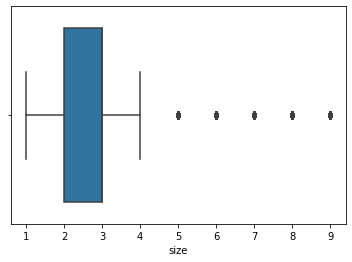

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


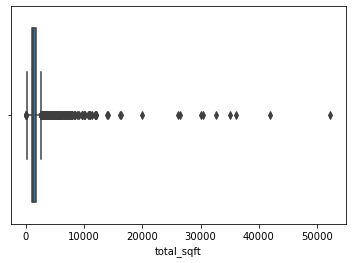

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


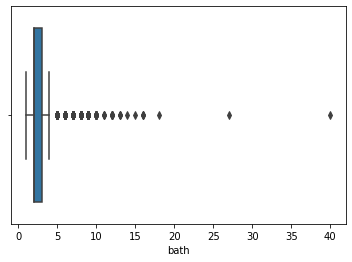

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


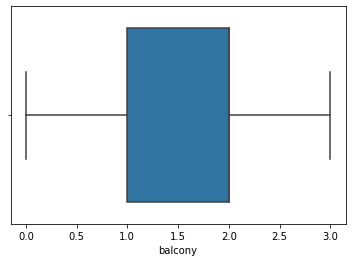

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


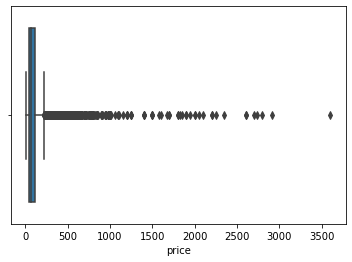

C:\Users\NANDINI MK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


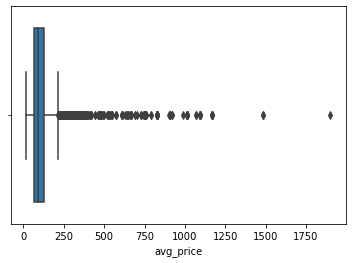

In [31]:
for i in list(combined_df.select_dtypes(np.number).columns):
    sns.boxplot(combined_df[i])
    plt.show()

size,total_sqft,bath,price has outliers 

In [32]:
# Percentage of Outlier Present in each Column

for i in list(combined_df.select_dtypes(np.number).columns):
    q1 = combined_df[i].quantile(0.25)
    q3 = combined_df[i].quantile(0.75)
    iqr= q3-q1
    ul = q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    outliers = combined_df[(combined_df[i]>ul) | (combined_df[i]<ll)]
    outliers_per = round(len(outliers) / combined_df.shape[0],2)
    print(f'{i}: {outliers_per:.2%}')

size: 6.00%
total_sqft: 9.00%
bath: 8.00%
balcony: 0.00%
price: 9.00%
avg_price: 7.00%


In [33]:
#This process limits the influence of outliers by capping them at the calculated limits.
for i in list(combined_df.select_dtypes(np.number).columns):
    q1=combined_df[i].quantile(0.25)
    q3=combined_df[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    combined_df[i]=combined_df[i].apply(lambda x:ll if x<ll else ul if x>ul else x )

# Qualitative Analysis

In [34]:
#for i in list(combined_df.select_dtypes('object').columns):
 #   sns.countplot(x=combined_df[i])
 #   plt.show()

<AxesSubplot:>

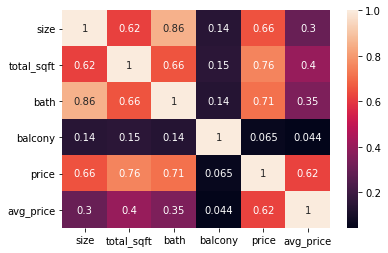

In [35]:
sns.heatmap(combined_df.corr(),annot=True)

# Encoding

In [36]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14799
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        14800 non-null  object 
 1   location         14799 non-null  object 
 2   size             14800 non-null  float64
 3   society          8672 non-null   object 
 4   total_sqft       14800 non-null  float64
 5   bath             14800 non-null  float64
 6   balcony          14800 non-null  int64  
 7   price            13320 non-null  float64
 8   avg_price        14746 non-null  float64
 9   area_category    14800 non-null  object 
 10  SocietyPresence  14800 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [37]:
from sklearn.preprocessing import OrdinalEncoder
priority_list = [['Carpet  Area','Plot  Area', 'Built-up  Area', 'Super built-up  Area']]
oe=OrdinalEncoder()
combined_df['area_type']=oe.fit_transform(combined_df[['area_type']])

In [38]:
combined_df['SocietyPresence']=pd.get_dummies(combined_df['SocietyPresence'],drop_first=True,dtype='int64')

In [39]:
combined_df.groupby(['area_category'])['price'].mean()

area_category
costly_area    192.123731
normal_area     88.650667
Name: price, dtype: float64

In [40]:
priority_list = [['Carpet  Area','Plot  Area', 'Built-up  Area', 'Super built-up  Area']]
oe=OrdinalEncoder()
combined_df['area_type']=oe.fit_transform(combined_df[['area_type']])

In [41]:
priority_list = [['normal_area','costly_area']]
oe=OrdinalEncoder()
combined_df['area_category']=oe.fit_transform(combined_df[['area_category']])

In [42]:
combined_df.columns

Index(['area_type', 'location', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'avg_price', 'area_category', 'SocietyPresence'],
      dtype='object')

In [43]:
combined_df.drop(['avg_price','location','society'],axis=1,inplace=True)

# Base Model 

In [44]:
newtrain=combined_df.loc[0:train.shape[0]-1,:]
newtest=combined_df.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape

((13320, 9), (1480, 9), (13320, 8), (1480, 8))

In [45]:
newtest

,area_type,size,total_sqft,bath,balcony,price,area_category,SocietyPresence
13320,3.0,2.0,1225.0,2.0,2,NaN,1.0,1
13321,2.0,4.5,2400.0,4.5,2,NaN,1.0,0
13322,2.0,4.0,1650.0,4.5,2,NaN,1.0,1
13323,3.0,3.0,1322.0,3.0,1,NaN,1.0,1
13324,3.0,2.0,1161.0,2.0,1,NaN,1.0,1
...,...,...,...,...,...,...,...,...
14795,3.0,2.0,1246.0,2.0,1,NaN,1.0,1
14796,3.0,3.0,1660.0,3.0,2,NaN,1.0,0
14797,3.0,2.0,1216.0,2.0,2,NaN,1.0,1
14798,0.0,2.0,996.0,2.0,1,NaN,1.0,1


In [46]:
newtest.drop('price',axis=1,inplace=True)

C:\Users\NANDINI MK\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [48]:
x=newtrain.drop('price',axis=1)
y=newtrain['price']

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor()
pred_gbm=gbm.fit(x,y).predict(newtest)

In [53]:
submission=pd.DataFrame({'Per Person Price':pred_gbm})
submission.to_csv('submission.csv',index=False)